Importamos las funciones requeridas.

In [1]:
import sys
import os
from math import sin, cos, pi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from generator import generate
from runner import correr_instancia
from isotherm import isotherm_abs, isotherm_linear, isotherm_linear2, isotherm_bilinear
from risk import run_risks
from graph  import read_input, temp_graph, temp_graph_bilin, temp_graph_bilin2, iso_graph, risk_graph, bilinear, interpolated_iso_graph

Experimento 4.3.4 interpolación.

Generamos las instancias

In [4]:
instancia = f'ondas/interpolacion'
L = lambda t: sin(17*t+np.pi/2) * 150 + sin(5*t+np.pi/3) * 100 + sin(5*t) * 75 + sin(3*t) * 100 + sin(2*t) * 75
generate(instancia, f"ondas_interpolacion_raw" , 1, 2, 5 , 10, 400, 1, [lambda t : 1500], [L])
generate(instancia, f"ondas_interpolacion_low" , 1, 2, 10, 20, 400, 1, [lambda t : 1500], [L])
generate(instancia, f"ondas_interpolacion_mid" , 1, 2, 15, 30, 400, 1, [lambda t : 1500], [L])
generate(instancia, f"ondas_interpolacion_high", 1, 2, 25, 160, 400, 1, [lambda t : 1500], [L])

generando 1 instancias de ondas/interpolacion, con 5 radios y 10 angulos
generando 1 instancias de ondas/interpolacion, con 10 radios y 20 angulos
generando 1 instancias de ondas/interpolacion, con 15 radios y 30 angulos
generando 1 instancias de ondas/interpolacion, con 25 radios y 160 angulos


Resolvemos las instancias

In [6]:
instancia = f'ondas/interpolacion'
for subinstancia in ['ondas_interpolacion_raw', 'ondas_interpolacion_low', 'ondas_interpolacion_mid', 'ondas_interpolacion_high']:
    correr_instancia('temperatura', instancia, subinstancia, 'LU')
    isotherm_linear(instancia, subinstancia)

fin ondas/interpolacion, ondas_interpolacion_raw
fin ondas/interpolacion, ondas_interpolacion_low
fin ondas/interpolacion, ondas_interpolacion_mid


Graficamos

In [ ]:
instancia = f'ondas/interpolacion'
subinstancia = 'ondas_interpolacion_raw'
correr_instancia('temperatura', instancia, subinstancia, 'LU')
r_i, R_e, m, n, iso, ninst = read_input(instancia, subinstancia)

mult_n = 16
mult_m = 1

isotherm_abs(instancia, subinstancia)
iso_graph(instancia, subinstancia)

isotherm_linear(instancia, subinstancia)
iso_graph(instancia, subinstancia)

temp_graph(instancia, subinstancia)
temp_graph_bilin(instancia, subinstancia, mult_m, mult_n)

bilinear(instancia, subinstancia, mult_m, mult_n)
isotherm_bilinear(instancia, subinstancia, mult_m, mult_n)
interpolated_iso_graph(instancia, subinstancia, mult_m, mult_n)

isotherm_abs(instancia, 'ondas_interpolacion_high')
iso_graph(instancia, 'ondas_interpolacion_high')

isotherm_linear(instancia, 'ondas_interpolacion_high')
iso_graph(instancia, 'ondas_interpolacion_high')

bilinear(instancia, 'ondas_interpolacion_high', mult_m, mult_n)
isotherm_bilinear(instancia, 'ondas_interpolacion_high', mult_m, mult_n)
temp_graph(instancia, 'ondas_interpolacion_high')
temp_graph_bilin(instancia, 'ondas_interpolacion_high')
interpolated_iso_graph(instancia, 'ondas_interpolacion_high', mult_m, mult_n)

In [ ]:
def dir(ax, instance, subinstance, color, name):
    r_i, R_e, m, n, iso, ninst = read_input(instance, subinstance)
    theta = np.linspace(0, 2*np.pi, n+1)
    values = [float(line.strip()) for line in open(f'../../output/{instance}/{subinstance}.iso')]
    value_sets = [values[i*n:(i+1)*n] for i in range(ninst)]
    for i in range(len(value_sets)):
        print(f'graficando la isoterma de {instance}, entrada numero {i+1} con {m} radios y {n} angulos')
        r = np.array([value_sets[i][j:j+n] + [value_sets[i][j]] for j in range(0, len(value_sets[i]), n)]).reshape(-1, 1)
        plt.ylim(r_i, R_e)
        ax.plot(theta, r, color, label=name)
        ax.grid(True)
        

def interp(ax, instance, subinstance, color, name, mult_m = 2, mult_n = 2):
    r_i, R_e, m, n, iso, ninst = read_input(instance, subinstance)
    m *= mult_m
    n *= mult_n
    print(n)
    theta = np.linspace(0, 2*np.pi, n+1)
    values = [float(line.strip()) for line in open(f'../../output/{instance}/{subinstance}_interpolado.iso')]
    value_sets = [values[i*n:(i+1)*n] for i in range(ninst)]
    for i in range(len(value_sets)):
        print(f'graficando la isoterma de {instance}, entrada numero {i+1} con {m} radios y {n} angulos')
        r = np.array([value_sets[i][j:j+n] + [value_sets[i][j]] for j in range(0, len(value_sets[i]), n)]).reshape(-1, 1)
        plt.ylim(r_i, R_e)
        ax.plot(theta, [r_i]*(n+1), 'grey')
        ax.plot(theta, r, color, label=name)
        ax.grid(True)

sns.set_theme()
instancia = f'ondas/interpolacion'
subinstancia = 'ondas_interpolacion_raw'

fig, axe = plt.subplots(subplot_kw={'projection': 'polar'})

mult_n = 8
mult_m = 4

bilinear(instancia, subinstancia, mult_m, mult_n)
isotherm_bilinear(instancia, subinstancia, mult_m, mult_n)
interp(axe, instancia, subinstancia, 'r--', 'bilinear', mult_m, mult_n)

subinstancia = 'ondas_interpolacion_raw'

isotherm_abs(instancia, subinstancia)
dir(axe, instancia, subinstancia, '--', 'absoluto')

isotherm_linear(instancia, subinstancia)
dir(axe, instancia, subinstancia, 'm--', 'lineal')


subinstancia = 'ondas_interpolacion_high'

isotherm_linear(instancia, subinstancia)
dir(axe, instancia, subinstancia, 'c', 'real')

axe.set_rticks([])


plt.legend(loc=(-.4, 0.8))
plt.savefig('interpolacion.pdf', bbox_inches='tight')

In [ ]:
instancia = f'ondas/interpolacion'
L = lambda t: (sin(17*t+np.pi/2)+1) * 75 + (sin(5*t+np.pi/3)+1) * 50 + (sin(5*t)+1) * 35 + (sin(3*t)+1) * 50 + (sin(2*t)+1) * 30
generate(instancia, f"ondas_interpolacion_ejemplo" , 2, 10, 10, 80, 400, 1, [lambda t : 1500], [L])

instancia = f'ondas/interpolacion'
subinstancia = 'ondas_interpolacion_ejemplo'
#correr_instancia('temperatura', instancia, subinstancia, 'LU')
r_i, R_e, m, n, iso, ninst = read_input(instancia, subinstancia)

mult_n = 16
mult_m = 4

temp_graph(instancia, subinstancia, 'bilinear_low.pdf')
temp_graph_bilin(instancia, subinstancia, mult_m, mult_n, 'bilinear_high.pdf')

In [8]:
instancia = f'ondas/distancia'
L = lambda t: (sin(17*t+np.pi/2)+1) * 75 + (sin(5*t+np.pi/3)+1) * 50 + (sin(5*t)+1) * 35 + (sin(3*t)+1) * 50 + (sin(2*t)+1) * 30
for n in [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25, 30, 35, 40, 45, 50]:
    subinstancia = f"ondas_distancia_{n}"
    generate(instancia, subinstancia, 1, 2, n, n*2, 500, 1, [lambda t : 1500], [L])
    correr_instancia('temperatura', instancia, subinstancia, 'LU')

generando 1 instancias de ondas/distancia, con 5 radios y 10 angulos
fin ondas/distancia, ondas_distancia_5
generando 1 instancias de ondas/distancia, con 6 radios y 12 angulos
fin ondas/distancia, ondas_distancia_6
generando 1 instancias de ondas/distancia, con 7 radios y 14 angulos
fin ondas/distancia, ondas_distancia_7
generando 1 instancias de ondas/distancia, con 8 radios y 16 angulos
fin ondas/distancia, ondas_distancia_8
generando 1 instancias de ondas/distancia, con 9 radios y 18 angulos
fin ondas/distancia, ondas_distancia_9
generando 1 instancias de ondas/distancia, con 10 radios y 20 angulos
fin ondas/distancia, ondas_distancia_10
generando 1 instancias de ondas/distancia, con 11 radios y 22 angulos
fin ondas/distancia, ondas_distancia_11
generando 1 instancias de ondas/distancia, con 12 radios y 24 angulos
fin ondas/distancia, ondas_distancia_12
generando 1 instancias de ondas/distancia, con 13 radios y 26 angulos
fin ondas/distancia, ondas_distancia_13
generando 1 instanci

18


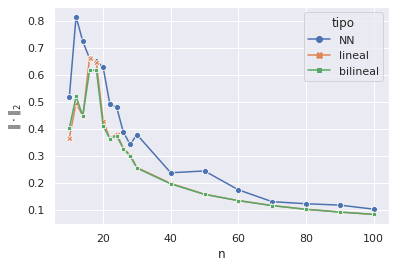

In [14]:
instancia = f'ondas/distancia'
#L = lambda t: (sin(17*t+np.pi/2)+1) * 75 + (sin(5*t+np.pi/3)+1) * 50 + (sin(5*t)+1) * 35 + (sin(3*t)+1) * 50 + (sin(2*t)+1) * 30
#generate(instancia, "ondas_distancia_real", 1, 2, 50, 180, 500, 1, [lambda t : 1500], [L])
#correr_instancia('temperatura', instancia, "ondas_distancia_real", 'LU')
isotherm_linear(instancia, 'ondas_distancia_real')
real_line = [float(line.strip()) for line in open(f'../../output/{instancia}/ondas_distancia_real.iso')]

def isotherm_real(theta):
    angle = np.rad2deg(theta) / 2
    if angle % 1 == 0:
        return real_line[int(angle)]
    else:
        return (1 - angle % 1) * real_line[int(np.floor(angle))] + (angle % 1) * real_line[int(np.ceil(angle))]

N = 51 + 1
abs  = []
lin  = []
blin = []
#calculo de isotermas
for n in [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25, 30, 35, 40, 45, 50]:
    subinstancia = f"ondas_distancia_{n}"
    isotherm_abs(instancia, subinstancia)
    abs += [[float(line.strip()) for line in open(f'../../output/{instancia}/{subinstancia}.iso')]]
    isotherm_linear(instancia, subinstancia)
    lin += [[float(line.strip()) for line in open(f'../../output/{instancia}/{subinstancia}.iso')]]
    mult_n = 2
    mult_m = 2
    bilinear(instancia, subinstancia, mult_m, mult_n)
    isotherm_bilinear(instancia, subinstancia)
    blin += [[float(line.strip()) for line in open(f'../../output/{instancia}/{subinstancia}_interpolado.iso')]]

new_abs  = []
new_lin  = []
new_blin = []
for i in range(len(abs)):
    subinstancia = f"ondas_distancia_{n}"
    I_abs  = []
    I_lin  = []
    I_blin = []
    for k in range(180):
        t = k/180 * (len(abs[i])-1)
        if np.abs(t % 1) <= 1e-6:
            I_abs += [abs[i][int(t)]]
            I_lin += [lin[i][int(t)]]
            I_blin += [blin[i][int(t*2)]]
        else:
            prev = int(np.floor(t))
            next = int(np.ceil(t))
            t = t % 1
            I_abs += [(1-t) * abs[i][prev] + t * abs[i][next]]
            I_lin += [(1-t) * lin[i][prev] + t * lin[i][next]]
            I_blin += [(1-t) * blin[i][prev*2] + t * blin[i][next*2]]
    new_abs += [I_abs]
    new_lin += [I_lin]
    new_blin += [I_blin]

abs_norm  = []
lin_norm  = []
blin_norm = []
#suma de normas
print(len(new_abs))
for i in range(len(new_abs)):
    abs_norm += [0]
    lin_norm += [0]
    blin_norm += [0]
    for k in range(180):
        abs_norm[-1] += (new_abs[i][k] - real_line[k])**2
        lin_norm[-1] += (new_lin[i][k] - real_line[k])**2
        blin_norm[-1] += (new_blin[i][k] - real_line[k])**2
    abs_norm[-1] = np.sqrt(abs_norm[-1])
    lin_norm[-1] = np.sqrt(lin_norm[-1])
    blin_norm[-1] = np.sqrt(blin_norm[-1])

abs = pd.DataFrame({'values': abs_norm})
abs['tipo'] = 'NN'
abs['n'] = list(map(lambda t: t*2, [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25, 30, 35, 40, 45, 50]))
lin = pd.DataFrame({'values':lin_norm})
lin['tipo'] = 'lineal'
lin['n'] = list(map(lambda t: t*2, [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25, 30, 35, 40, 45, 50]))
blin = pd.DataFrame({'values':blin_norm})
blin['tipo'] = 'bilineal'
blin['n'] = list(map(lambda t: t*2, [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25, 30, 35, 40, 45, 50]))

df = pd.concat([abs, lin, blin]).drop_duplicates().reset_index(drop=True)

sns.set_theme()
ax = sns.lineplot(data=df, x="n", y="values", hue="tipo", style="tipo", markers=True, dashes=False)
#sns.kdeplot(data=df, x="n", hue="type", multiple="stack")
ax.set(xlabel='n', ylabel='$|\!|\cdot|\!|_2$')
plt.savefig('abs_lin_blin.pdf', bbox_inches='tight')
#df = pd.DataFrame(abs)

FileNotFoundError: [Errno 2] No such file or directory: '../../output/ondas/distancia/ondas_interpolacion_high.temp'

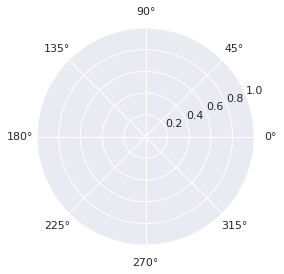

In [16]:
def dir(ax, instance, subinstance, color, name, linestyle='-'):
    r_i, R_e, m, n, iso, ninst = read_input(instance, subinstance)
    theta = np.linspace(0, 2*np.pi, n+1)
    values = [float(line.strip()) for line in open(f'../../output/{instance}/{subinstance}.iso')]
    value_sets = [values[i*n:(i+1)*n] for i in range(ninst)]
    for i in range(len(value_sets)):
        print(f'graficando la isoterma de {instance}, entrada numero {i+1} con {m} radios y {n} angulos')
        r = np.array([value_sets[i][j:j+n] + [value_sets[i][j]] for j in range(0, len(value_sets[i]), n)]).reshape(-1, 1)
        plt.ylim(r_i, R_e)
        ax.plot(theta, r, color=color, label=name, linestyle=linestyle)
        ax.grid(True)
        

def interp(ax, instance, subinstance, color, name, mult_m = 2, mult_n = 2):
    r_i, R_e, m, n, iso, ninst = read_input(instance, subinstance)
    m *= mult_m
    n *= mult_n
    print(m, n)
    theta = np.linspace(0, 2*np.pi, n+1)
    values = [float(line.strip()) for line in open(f'../../output/{instance}/{subinstance}_interpolado.iso')]
    value_sets = [values[i*n:(i+1)*n] for i in range(ninst)]
    print(len(value_sets))
    print(len(value_sets[0]))
    for i in range(len(value_sets)):
        print(f'graficando la isoterma de {instance}, entrada numero {i+1} con {m} radios y {n} angulos')
        r = np.array([value_sets[i][j:j+n] + [value_sets[i][j]] for j in range(0, len(value_sets[i]), n)]).reshape(-1, 1)
        plt.ylim(r_i, R_e)
        ax.plot(theta, [r_i]*(n+1), 'grey')
        ax.plot(theta, r, color=color, label=name)
        ax.grid(True)

sns.set_theme()


fig, axe = plt.subplots(subplot_kw={'projection': 'polar'})

instancia = f'ondas/interpolacion'
subinstancia = 'ondas_interpolacion_high'

isotherm_linear(instancia, subinstancia)
dir(axe, instancia, subinstancia, (0, 0, 0), 'real', 'dashed')


subinstancia = 'ondas_interpolacion_raw'

isotherm_abs(instancia, subinstancia)
dir(axe, instancia, subinstancia, (76/255, 114/255, 176/255), 'NN')

isotherm_linear(instancia, subinstancia)
dir(axe, instancia, subinstancia, (221/255, 132/255, 82/255), 'lineal')

mult_n = 2
mult_m = 2

bilinear(instancia, subinstancia, mult_m, mult_n)
isotherm_bilinear(instancia, subinstancia, mult_m, mult_n)
interp(axe, instancia, subinstancia, (85/255, 168/255, 104/255), 'bilineal', mult_m, mult_n)

axe.set_rticks([])

plt.legend(loc=(-.4, 0.8))
plt.savefig('interpolacion.pdf', bbox_inches='tight')